02_시각화
## #01.필요한 패키지 및 샘플 데이터 준비

## 1) 패키지 참조

In [1]:
import numpy as np
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot

### 데이터 가져오기
> 데이터 출처; 국가통계포탈 (_

In [5]:
 교통사고csv= read_csv('traffic.csv', encoding="euc-kr")
교통사고csv

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


In [ ]:
### 3) 데이터 전처리 (년도별 합계구하기)


In [6]:
교통사고tmp = 교통사고csv.filter(['년도','발생건수','사망자수','부상자수'])
교통사고df = 교통사고tmp.groupby('년도').sum()
교통사고df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


In [8]:
pyplot.rcParams["font.family"] = 'Malgun Gothic'
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["figure.figsize"] = (20, 10)

Text(0, 0.5, '발생건수')

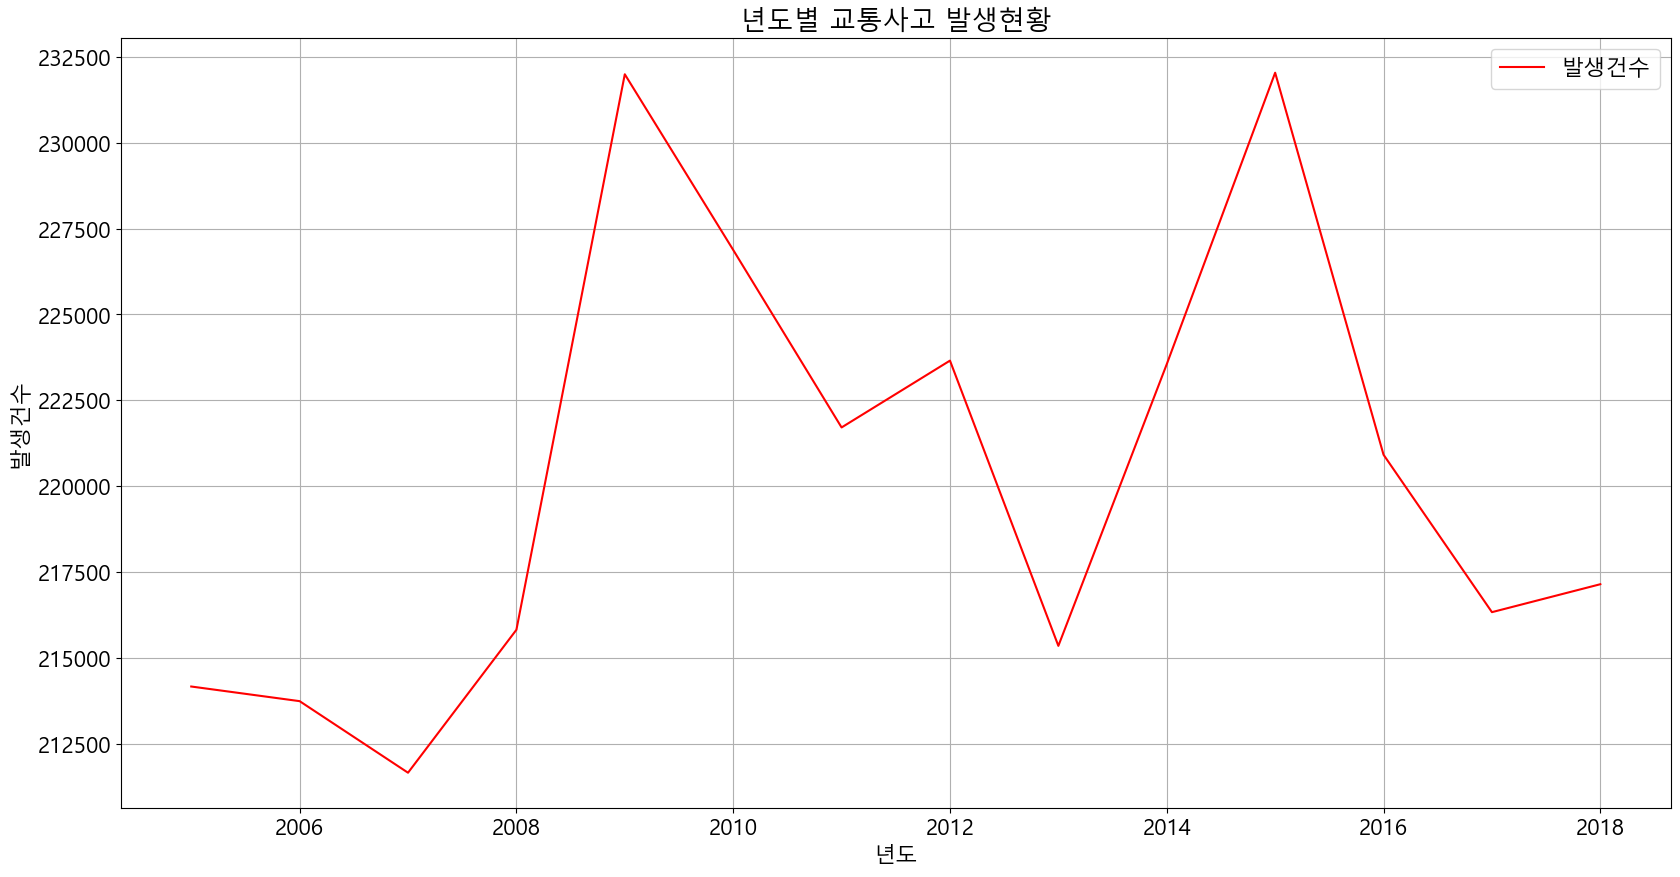

In [11]:
교통사고df['발생건수'].plot(color="#ff0000")
pyplot.grid()
pyplot.legend()
pyplot.title('년도별 교통사고 발생현황')
pyplot.xlabel("년도") 
pyplot.ylabel("발생건수")                      

In [13]:
xpos = np.arange(len(교통사고df["발생건수"]))

In [14]:
xtext = list(교통사고df.index)

In [15]:
for i,v in enumerate(xtext):
    xtext[i]="%d년"%v

xtext


['2005년',
 '2006년',
 '2007년',
 '2008년',
 '2009년',
 '2010년',
 '2011년',
 '2012년',
 '2013년',
 '2014년',
 '2015년',
 '2016년',
 '2017년',
 '2018년']

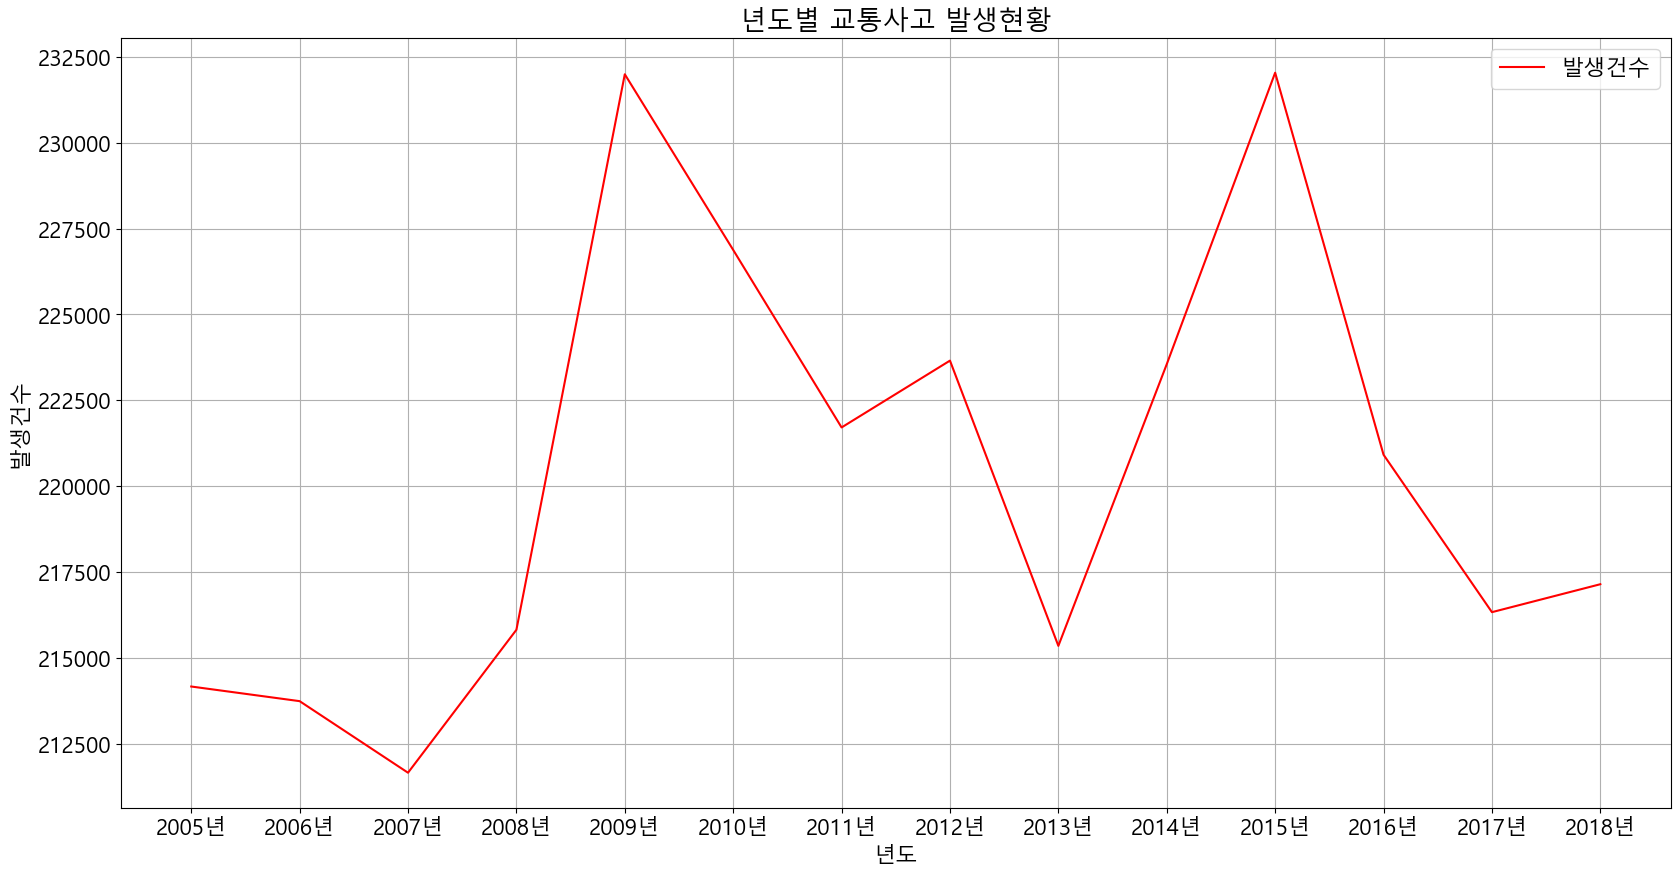

In [16]:
교통사고df['발생건수'].plot(color="#ff0000")
pyplot.grid()
pyplot.legend()
pyplot.title('년도별 교통사고 발생현황')
pyplot.xlabel("년도") 
pyplot.ylabel("발생건수") 
#text
pyplot.xticks(교통사고df.index, xtext)
pyplot.show()

### 2) 전체 :컬럼에 대한 다중 선 그래프
> 컬럼 수 만큼 색상 값을 리스트로 만들면 각 컬럼에 대한 색상을 지정할 수 있다.

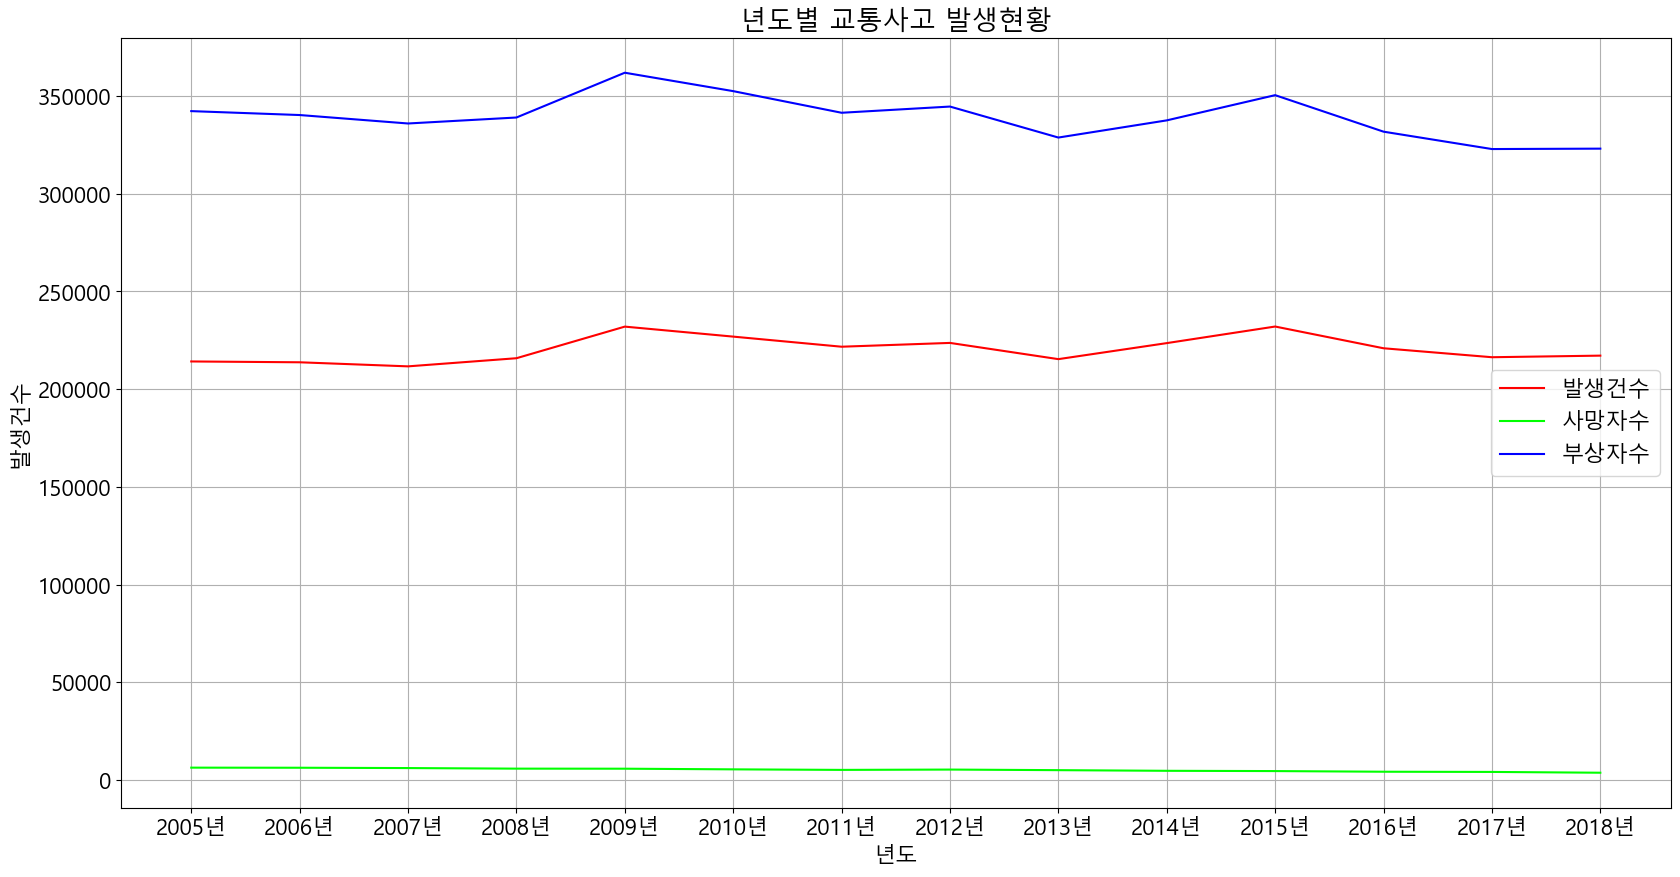

In [17]:
교통사고df.plot(color=['#ff0000', '#00ff00','#0000ff'])
pyplot.grid()
pyplot.legend()
pyplot.title('년도별 교통사고 발생현황')
pyplot.xlabel("년도") 
pyplot.ylabel("발생건수") 
#text
pyplot.xticks(교통사고df.index, xtext)
pyplot.show()

## #04. 세로 막대 그래프
### 1) 특정 컬럼에 대한 시각화
#### 기본 옵션만 사용하기 
python
데이터프레임객체['컬럼'].plot.bar()
`

* rot 파라미터는  x 축 텍스트의 각도, 기본값 90
* width 파라미터는 모든 막대가 공백없이 꽉 찬 상태를 1로 하여 비율적으로 지정, 기본값은 0.5

막대그래프는 index의 데이터 타입이 숫자, 문자열에 상관없이 x축이 0부터 시작되는 좌표계를 갖는다.

그러므로 `xticks()` 함수를 사용할 때 반드시 x 축 좌표에 대한 지정이 이루어져야 한다.


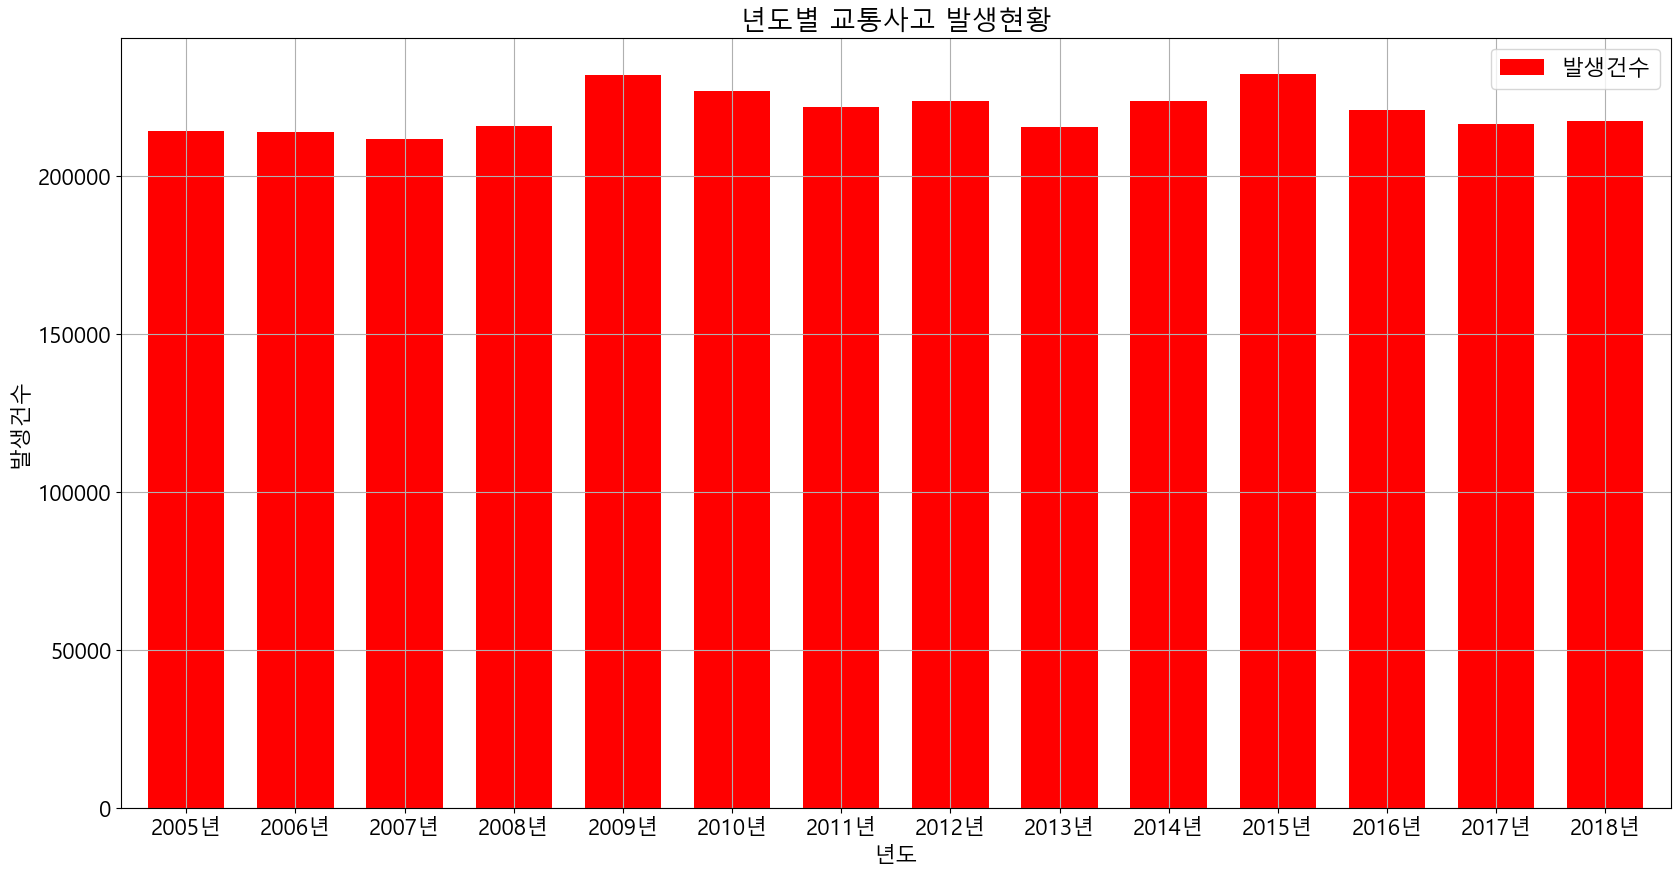

In [21]:
교통사고df['발생건수'].plot.bar(color="#ff0000", width=0.7, rot=0)
pyplot.grid()
pyplot.legend()
pyplot.title('년도별 교통사고 발생현황')
pyplot.xlabel("년도") 
pyplot.ylabel("발생건수") 
#text
pyplot.xticks(xpos, xtext)
pyplot.show()

#### 텍스트 출력 처리, y축 범위 지정
#### 텍스트 출력은 그래프 x y 좌표를 구해서 모든 문자열을 개별적으로 출력해야한다.

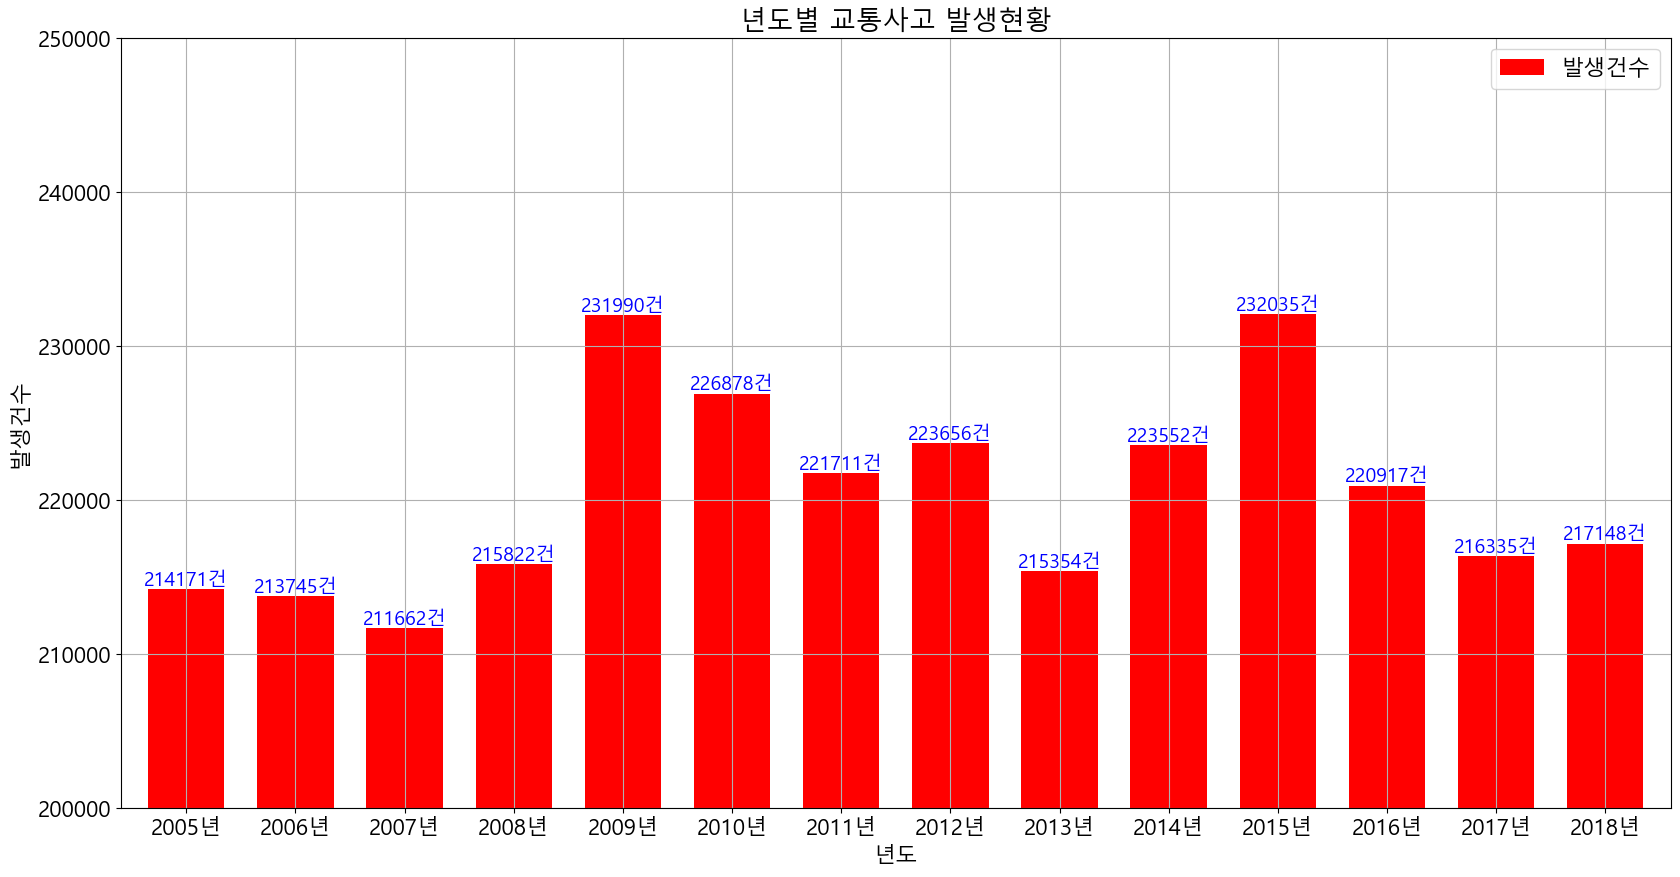

In [26]:
교통사고df['발생건수'].plot.bar(color="#ff0000", width=0.7, rot=0)
pyplot.grid()
pyplot.legend()
pyplot.title('년도별 교통사고 발생현황')
pyplot.xlabel("년도") 
pyplot.ylabel("발생건수") 
#text
pyplot.xticks(xpos, xtext)

# y축 범위설정 / x 축 범위 설정할 경우 xlim(min, max)
pyplot.ylim(200000,250000)

#그래프에 텍스트 표시하기
#그래프에 표시되는 실 데이터는 세로축 좌표를 의미하고 가로축은 0부터 시작하는 좌표값을 갖는다
for i,v in enumerate(list(교통사고df["발생건수"])):
    txt = "%d건"%v
    pyplot.text(i,v,txt, fontsize=14, color="#0000ff", horizontalalignment="center", verticalalignment="bottom")
        
pyplot.show()

### 2) 전체컬럼에 대한 시각화

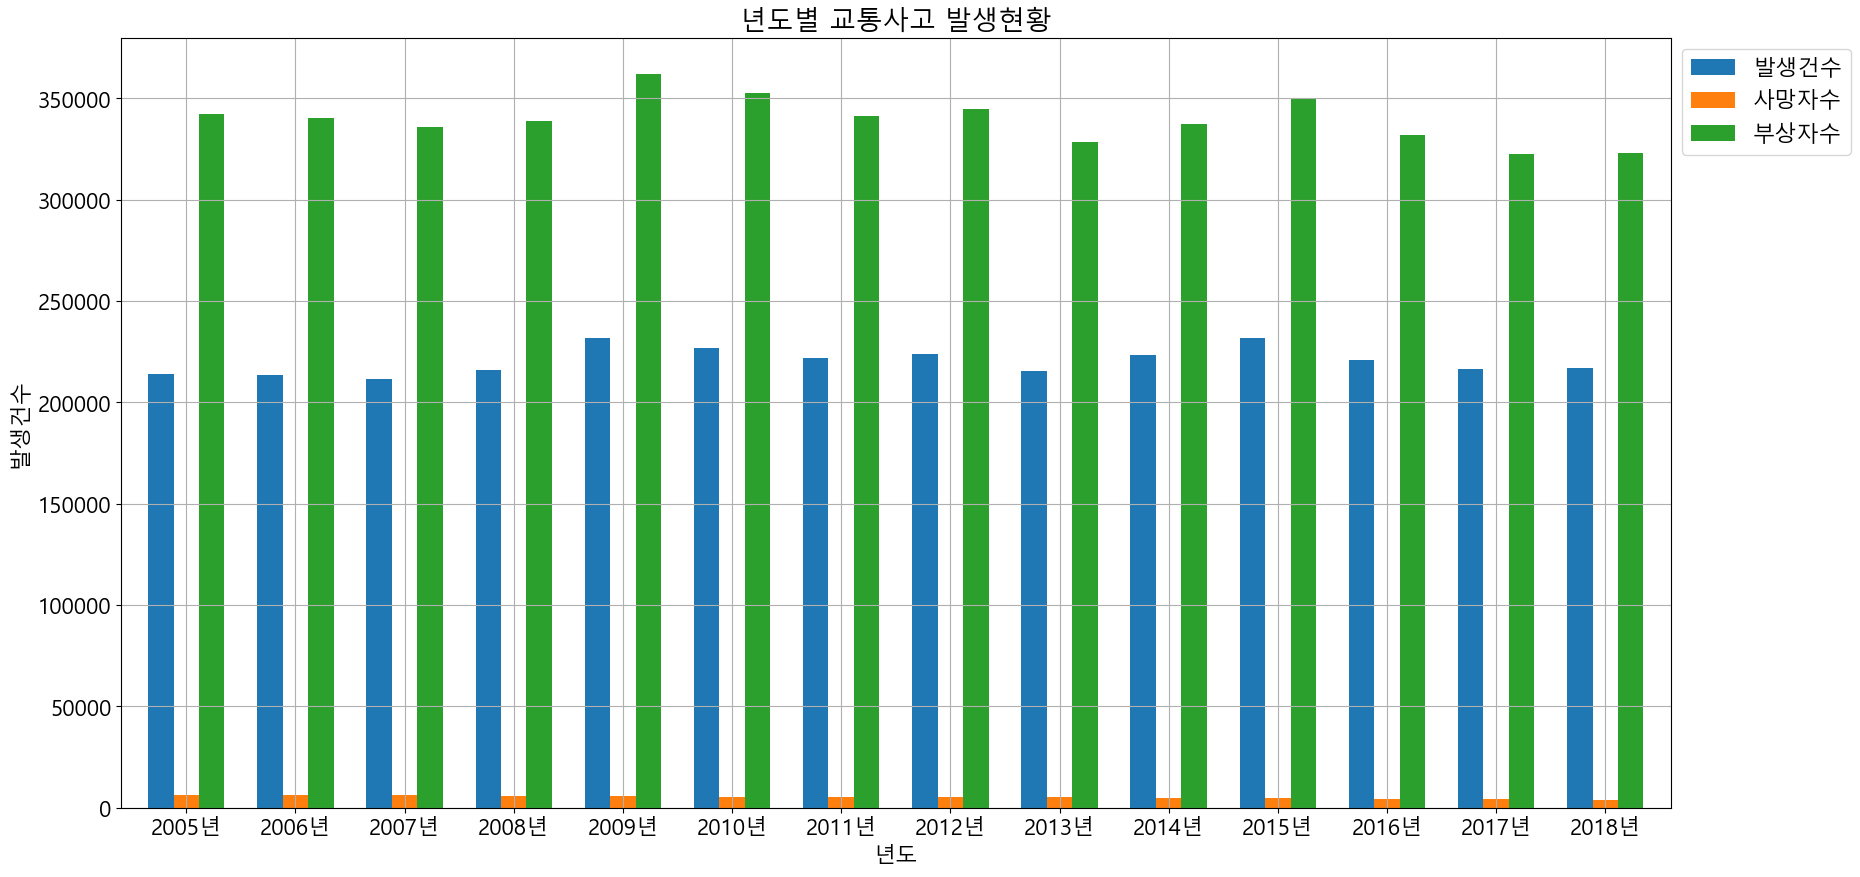

In [31]:
교통사고df.plot.bar(rot=0, width=0.7)
pyplot.grid()
#범례 위치변경
#pyplot.legend(bbox_to_anchor=(0,0))
pyplot.legend(bbox_to_anchor=(1,1))
pyplot.title('년도별 교통사고 발생현황')
pyplot.xlabel("년도") 
pyplot.ylabel("발생건수") 
#text
pyplot.xticks(xpos, xtext)
pyplot.show()

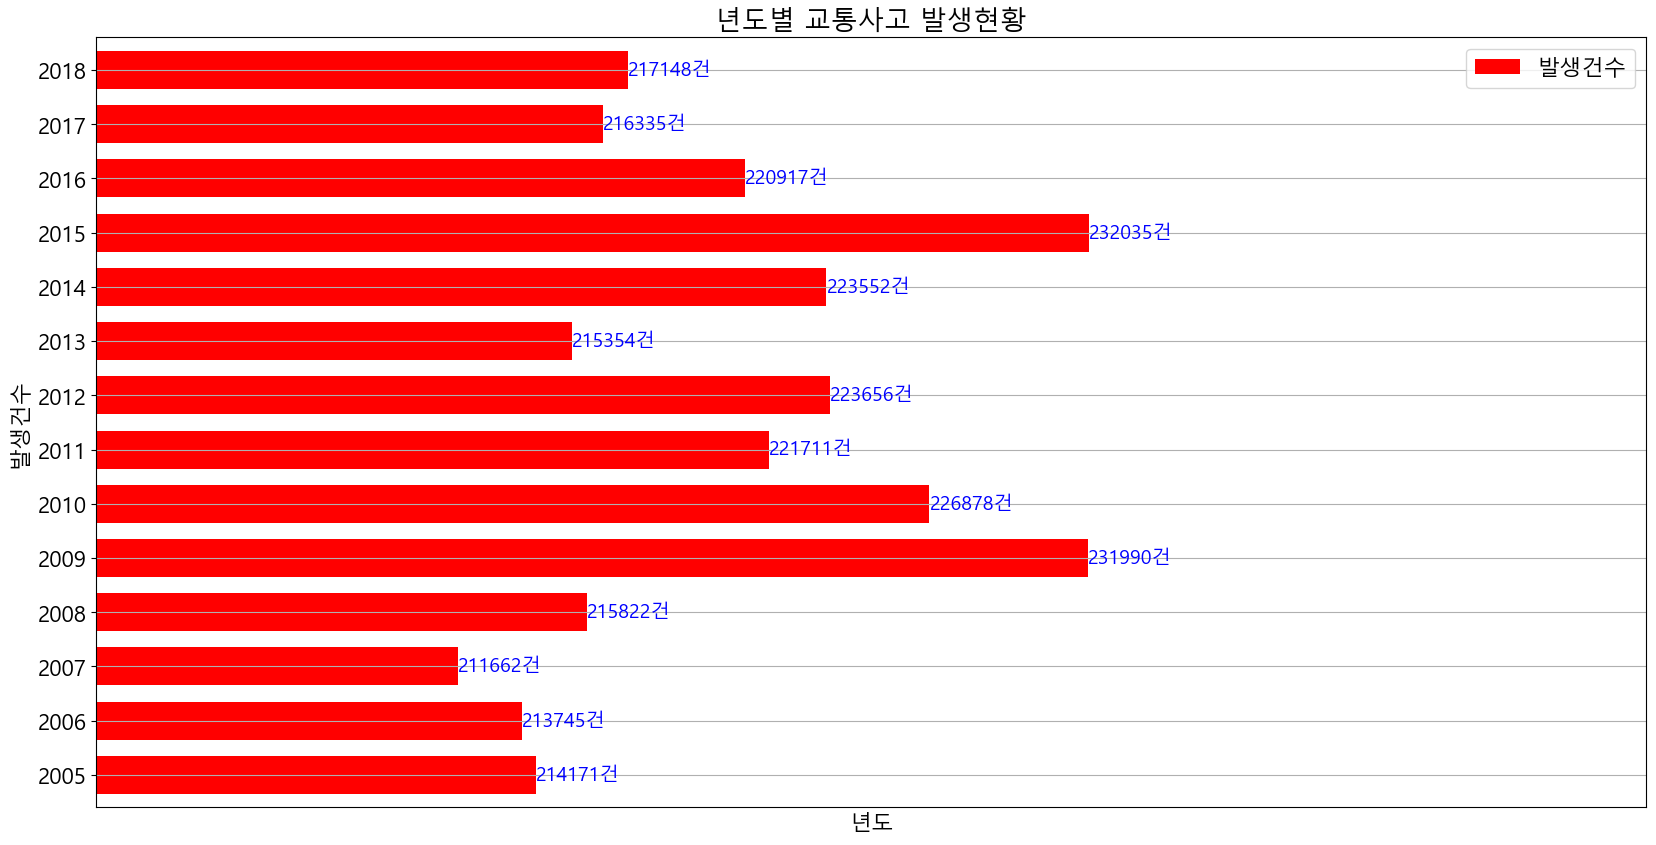

In [38]:
교통사고df['발생건수'].plot.barh(color="#ff0000", width=0.7, rot=0)
pyplot.grid()
#범례 위치변경
#pyplot.legend(bbox_to_anchor=(0,0))
pyplot.legend(bbox_to_anchor=(1,1))
pyplot.title('년도별 교통사고 발생현황')
pyplot.xlabel("년도") 
pyplot.ylabel("발생건수") 
#text
for i,v in enumerate(list(교통사고df["발생건수"])):
    txt = "%d건"%v
    pyplot.text(v,i,txt, fontsize=14, color="#0000ff", horizontalalignment="left", verticalalignment="center")
        
pyplot.xticks(xpos, xtext)
pyplot.xlim(200000,250000)
pyplot.show()

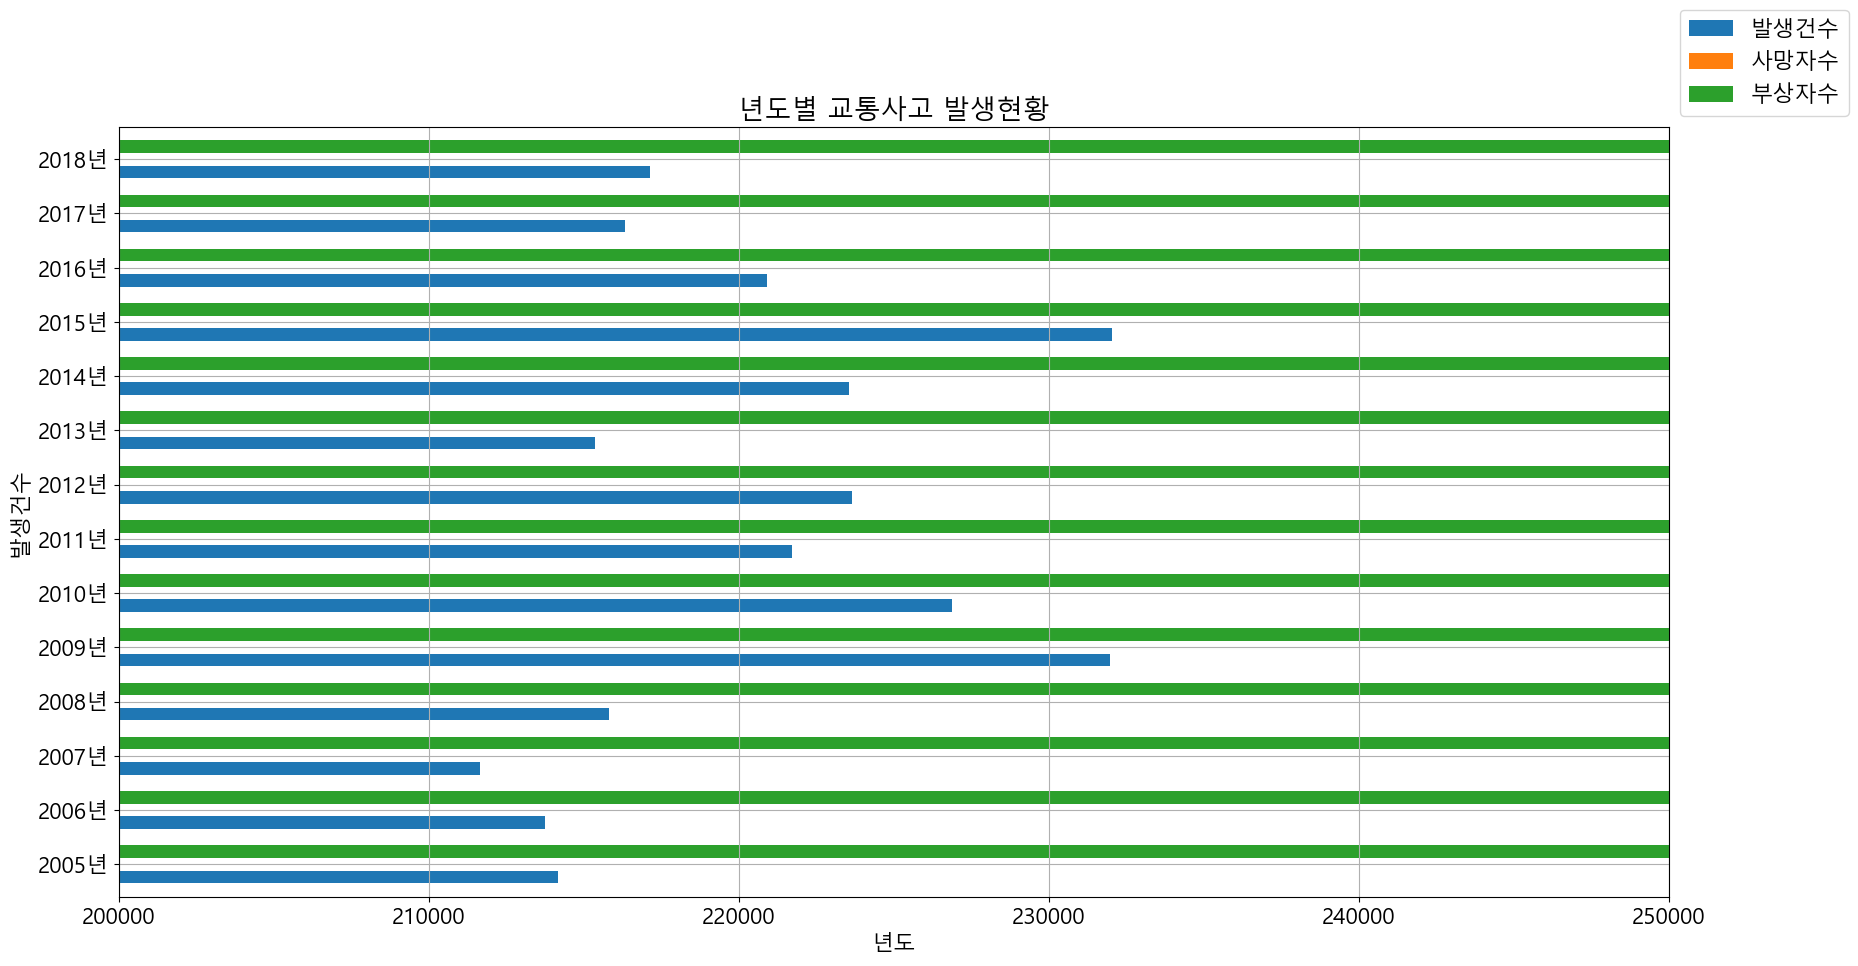

In [43]:
교통사고df.plot.barh(width=0.7, rot=0)
pyplot.grid()
#범례 위치변경
#pyplot.legend(bbox_to_anchor=(0,0))
pyplot.legend(bbox_to_anchor=(1,1))
pyplot.title('년도별 교통사고 발생현황')
pyplot.xlabel("년도") 
pyplot.ylabel("발생건수") 
   
pyplot.yticks(xpos, xtext)
pyplot.xlim(200000,250000)
pyplot.show()

## 파이그래프
데이터프레임의 특정컬럼을 지정하여 전체를 기준으로 어느정도의 비율을 차지하는 지를 시각화 하는 그래프

In [44]:
교통사고평균 = 교통사고df.mean()
교통사고평균

발생건수    220355.428571
사망자수      5245.428571
부상자수    339415.214286
dtype: float64

In [46]:
#구해진 결과를 가지고 데이터프레임 생성
교통사고평균df = DataFrame(교통사고평균, columns=["교통사고"])
교통사고평균df

,교통사고
발생건수,220355.428571
사망자수,5245.428571
부상자수,339415.214286


In [ ]:
파이프 그래프 표시 -> 반드시 특정 컬럼을 지정해야 한다. 

<Axes: ylabel='교통사고'>

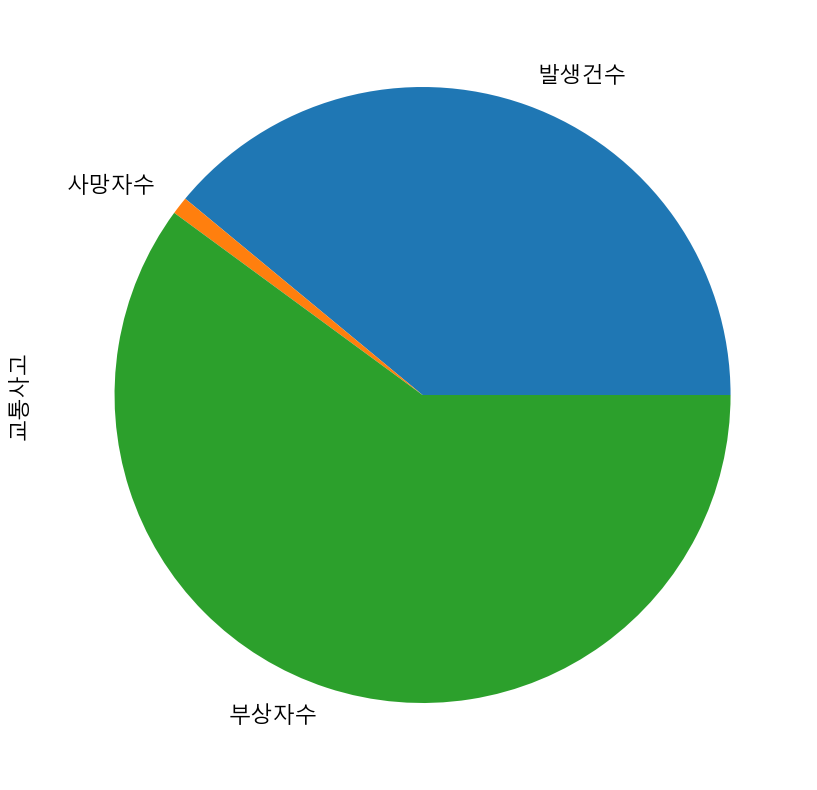

In [47]:
교통사고평균df['교통사고'].plot.pie()


NameError: name 'index' is not defined

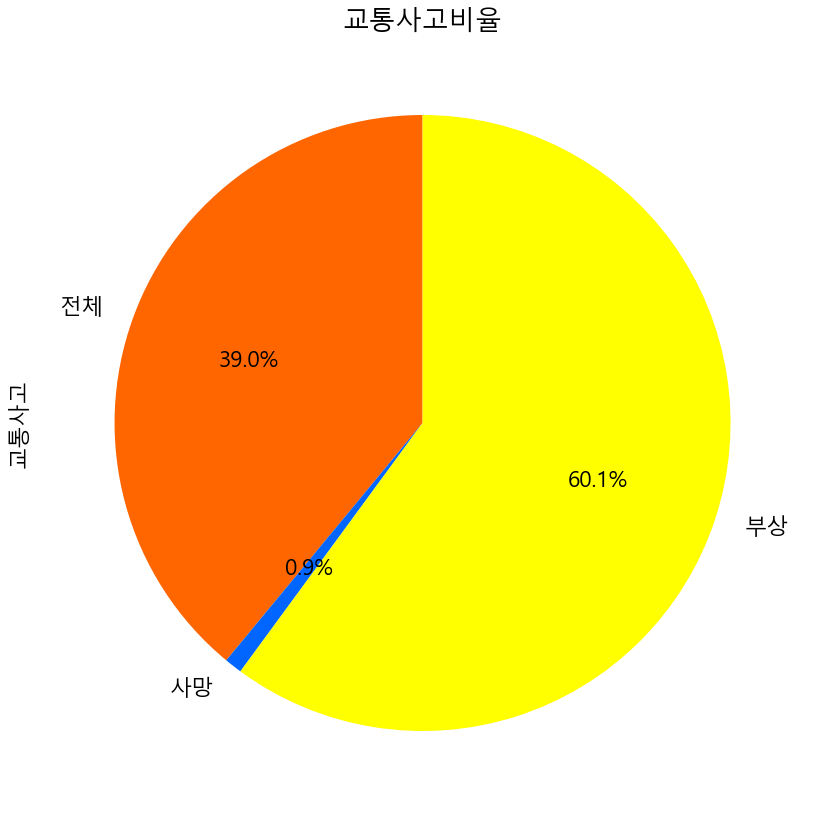

In [56]:
교통사고평균df['교통사고'].plot.pie(labels=['전체','사망','부상'], colors=["#ff6600","#0066ff","#ffff00"],
                         autopct="%0.1f%%", startangle=90)
pyplot.title("교통사고비율")
pyplot.legend(labels=list(교통사고평균df, index))
pyplot.ylabel(None)